# King County's House Prediction Regression

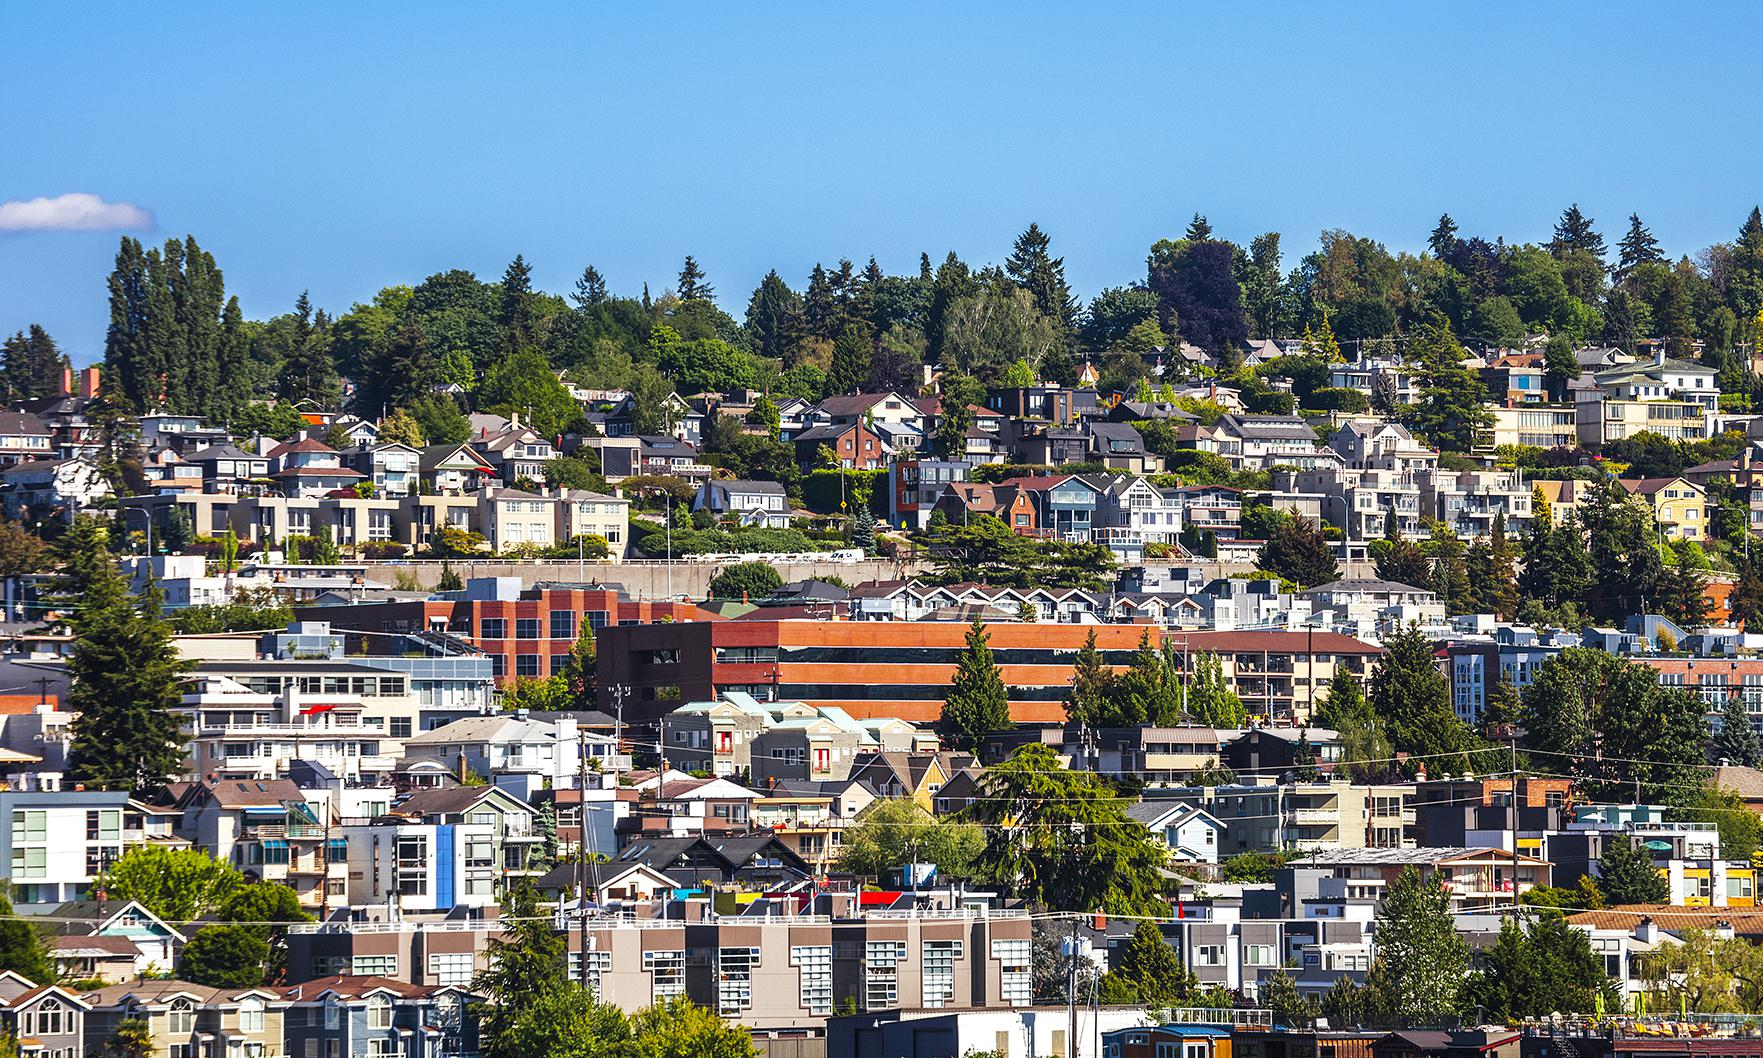

## Overview
***

This project uses King County House *[kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/) dataset which contains house sale prices which were sold between May 2014 aand May 2015 . This project follow the process of OSEM:
- Obtaining Data
- Scrubbing/Cleaning Data
- Exploring/Visualing Data
- Final Cleaning Data
- Modeling 
- Anaylsis
- Conclusion

## Business Problem
***

Providing Home Renovation Advice for Increased Home Value

The real estate agency faces a business problem in providing homeowners with accurate advice regarding home renovations and their potential impact on the estimated value of their properties. Homeowners often seek guidance on how specific renovations or improvements could enhance their home's value and by what amount.

The agency needs a data-driven solution to address this problem effectively. By leveraging the available dataset on King County housing, the agency aims to develop a predictive model that can provide homeowners with actionable insights and estimates regarding the potential increase in their property value due to specific renovations.

## Objectives
***

1. Develop a predictive model: Build a model that can estimate the potential increase in home value based on various renovation factors, such as adding bedrooms, improving home condition, or expanding living space.
2. Identify significant renovation factors: Determine which specific renovations have the most substantial impact on property value, allowing homeowners to prioritize their investments accordingly.
3. Provide accurate estimates: Offer homeowners reliable estimates of the expected value increase, helping them make informed decisions about potential renovations and improvements.
4. Enhance customer satisfaction: Deliver a valuable service that improves homeowners' confidence and satisfaction when making renovation choices, establishing the agency as a trusted advisor.

By addressing this business problem, the real estate agency can offer an added service to homeowners, strengthening their relationships and positioning themselves as experts in the market. The data-driven insights will empower homeowners to make informed decisions, leading to better outcomes and potentially increasing the agency's success in facilitating property transactions.

## Obtaining Data
***

For this multiple linear regression project we will be using the kc_house_data.csv dataset. We will obtain the data using the pandas package and retrieve valuable information pertaining to the dataset using its associated modules.

In [1]:
# importing important libraries for data cleaning and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [2]:
# importing the data into a dataframe
df1 = pd.read_csv('data/kc_house_data.csv')
# See the first 10 rows 
df1.head(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   
5    101930     1.0         0.0   0.0  ...     11        3890         1530.0   
6      6819     2.0         0.0   0.0  ...      7        1715              ?   
7      9711     1.0         0.0   NaN  ...      7        1060            0.0   
8      7470     1.0         0.0   0.0  ...      7        1050          730.0   
9      6560     2.0         0.0   0.0  ...      7        1890            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  
5     2001           0.0    98053  47.6561 -122.005           4760      101930  
6     1995           0.0    98003  47.3097 -122.327           2238        6819  
7     1963           0.0    98198  47.4095 -122.315           1650        9711  
8     1960           0.0    98146  47.5123 -122.337           1780        8113  
9     2003           0.0    98038  47.3684 -122.031           2390        7570  

[10 rows x 21 columns]

In [3]:
# Print dataframe summary and shape
df1.info();
print("\nDataframe shape: ", df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

#### Building Condition
* **1** - **Poor**- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.
* **2** - **Fair**- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.
* **3** -  **Average**- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.
* **4** - **Good**- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.
* **5** - **Very Good**- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

In [4]:
# description of the dataset
df1.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

## Scrubbing/Cleaning Data
***

Cleaning the dataset, going column per column, and inspecting for null values and dropping unnecessary columns that we won't be using in our linear regression.

In [5]:
# Check for any null values in the dataset
df1.isnull().sum().sort_values(ascending=False)

yr_renovated     3842
waterfront       2376
view               63
id                  0
sqft_above          0
sqft_living15       0
long                0
lat                 0
zipcode             0
yr_built            0
sqft_basement       0
condition           0
grade               0
date                0
floors              0
sqft_lot            0
sqft_living         0
bathrooms           0
bedrooms            0
price               0
sqft_lot15          0
dtype: int64

In [6]:
# converting yr_renovated na values into .median() and the type changed to int
df1['yr_renovated'].fillna(df1['yr_renovated'].median(), inplace = True) 
df1.yr_renovated = df1.yr_renovated.astype('int')

# any na values in the waterfront column are changed to .median() and the type changed to int 
df1['waterfront'].fillna(df1['waterfront'].median(), inplace = True)
df1.waterfront= df1.waterfront.astype('int')

# any na values in the view column are changed to 0 and the type changed to int
df1.loc[df1.view.isna(), 'view'] = 0
df1.view = df1.view.astype('int')

In [7]:
# identify number of rows contains '?'
(df1.sqft_basement == '?').sum()

454

In [8]:
# changing '?' values to 0 in sqft_basement column and also changing the type to float 
df1.sqft_basement = df1.sqft_basement.map(lambda x: '0' if x == '?' else x)
df1.sqft_basement = df1.sqft_basement.astype('float')

In [9]:
# Observing the dataframe, sqft_living = sqft_above + sqft_basement
# Remove some of 0 values, to give more accurate value
df1.sqft_basement = df1.sqft_living - df1.sqft_above

In [10]:
# Identify number of rows are duplicates
(df1.duplicated("id")).sum()

177

In [11]:
# Remove duplicates in id
df1 = df1.drop_duplicates(subset=['id'])

In [12]:
# Inspecting data that contain 33 bedrooms
df1[df1.bedrooms == 33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895  6/25/2014  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15856      6000     1.0           0     0  ...      7        1040   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15856            580      1947             0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700  

[1 rows x 21 columns]

In [13]:
# Inspecting highest price values to evaluate any differences
df1[df1.price == 7700000.0]

id        date      price  bedrooms  bathrooms  sqft_living  \
7245  6762700020  10/13/2014  7700000.0         6        8.0        12050   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245     27600     2.5           0     3  ...     13        8570   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7245           3480      1910          1987    98102  47.6298 -122.323   

      sqft_living15  sqft_lot15  
7245           3940        8800  

[1 rows x 21 columns]

In [14]:
# Inspecting data that contain 3 bedrooms to evaluate the comparison to 33 bedrooms
df1[df1.bedrooms == 3].head(3)

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
4        7503  

[3 rows x 21 columns]

In [15]:
# Looking at data between 3 and 33, it is obvious it was a typo
# Therefore, replacing 33 to 3 bedroom instead
df1.bedrooms = df1.bedrooms.replace([33], 3)

In [16]:
#changing index of date from object to datetime64[ns]
df1.date = pd.to_datetime(df1.date.astype("datetime64[ns]"))

In [17]:
# Removing unnecessary column
df1 = df1.drop(columns = ['id', 'sqft_living15', 'sqft_lot15'])
# Reason for dropping sqft_living15 and sqft_lot15 as this only looking at the feastures of the neighbouring houses 

In [18]:
# Print dataframe summary and shape
df1.info();
print("\nDataframe shape: ", df1.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21420 non-null  datetime64[ns]
 1   price          21420 non-null  float64       
 2   bedrooms       21420 non-null  int64         
 3   bathrooms      21420 non-null  float64       
 4   sqft_living    21420 non-null  int64         
 5   sqft_lot       21420 non-null  int64         
 6   floors         21420 non-null  float64       
 7   waterfront     21420 non-null  int32         
 8   view           21420 non-null  int32         
 9   condition      21420 non-null  int64         
 10  grade          21420 non-null  int64         
 11  sqft_above     21420 non-null  int64         
 12  sqft_basement  21420 non-null  int64         
 13  yr_built       21420 non-null  int64         
 14  yr_renovated   21420 non-null  int32         
 15  zipcode        2142

In [19]:
df1.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.142000e+04  21420.000000  21420.000000  21420.000000  2.142000e+04   
mean   5.407393e+05      3.372549      2.118429   2083.132633  1.512804e+04   
std    3.679311e+05      0.902995      0.768720    918.808412  4.153080e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.225000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1920.000000  7.614000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.069050e+04   
max    7.700000e+06     11.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21420.000000  21420.000000  21420.000000  21420.000000  21420.000000   
mean       1.495985      0.006816      0.233987      3.410784      7.662792   
std        0.540081      0.082280      0.765437      0.650035      1.171971   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated      zipcode  \
count  21420.000000   21420.000000  21420.000000  21420.000000  21420.00000   
mean    1791.170215     291.962418   1971.092997     68.956723  98077.87437   
std      828.692965     442.875502     29.387141    364.552298     53.47748   
min      370.000000       0.000000   1900.000000      0.000000  98001.00000   
25%     1200.000000       0.000000   1952.000000      0.000000  98033.00000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.00000   
75%     2220.000000     560.000000   1997.000000      0.000000  98117.00000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.00000   

                lat          long  
count  21420.000000  21420.000000  
mean      47.560197   -122.213784  
std        0.138589      0.140791  
min       47.155900   -122.519000  
25%       47.471200   -122.328000  
50%       47.572100   -122.230000  
75%       47.678100   -122.125000  
max       47.777600   -121.315000

## Exploring/Visualing Data
***

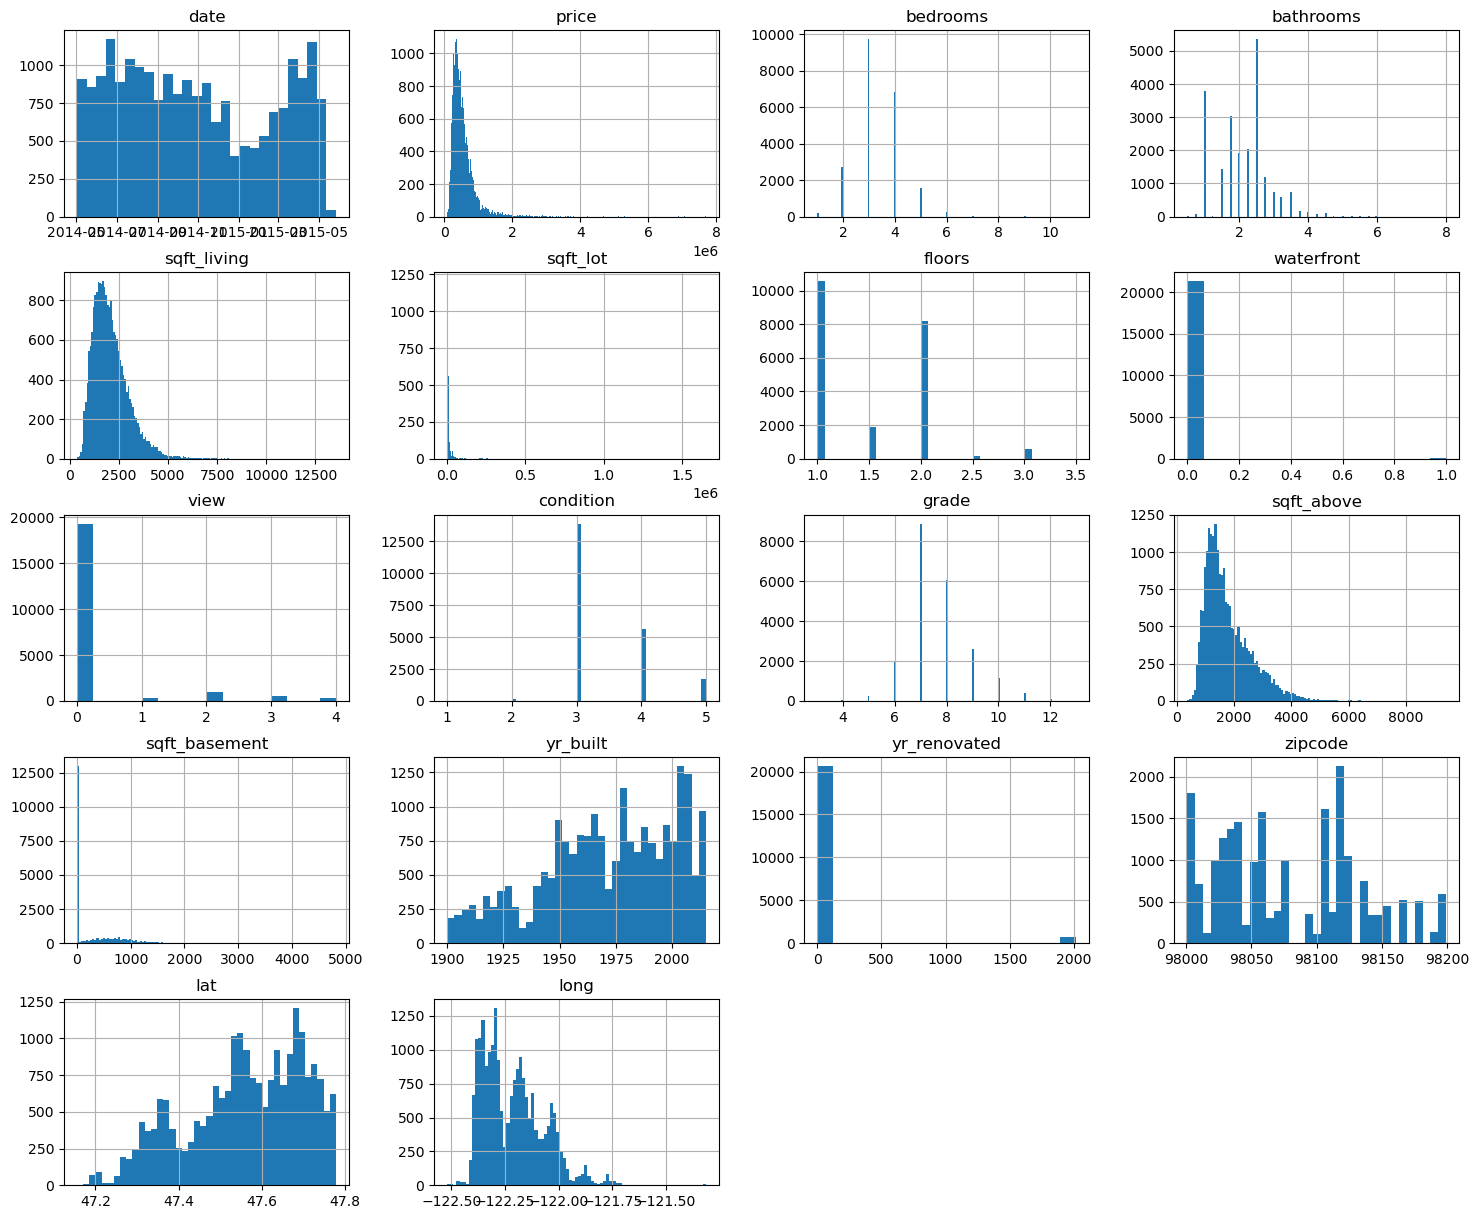

In [20]:
# check how our histograms are looking
df1.hist(figsize=(18,15), bins='auto');

**Histograms: Checking out the distributions of each columns**
- We can see here that there is no perfectly normal variables
- The variables are highly skewed 

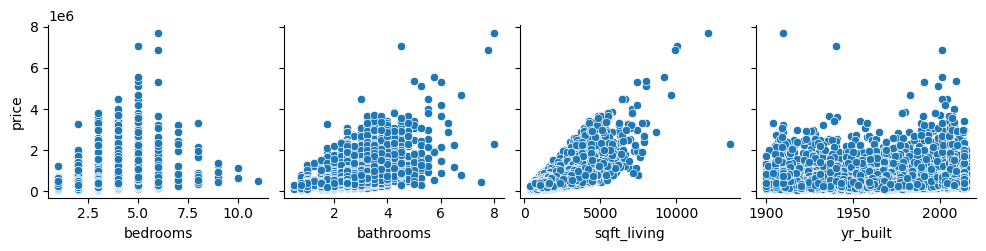

In [21]:
# pairplot of certain features from the dataset vs. price 
sns.pairplot(data=df1, x_vars=['bedrooms','bathrooms','sqft_living', 'yr_built'], y_vars=['price']);

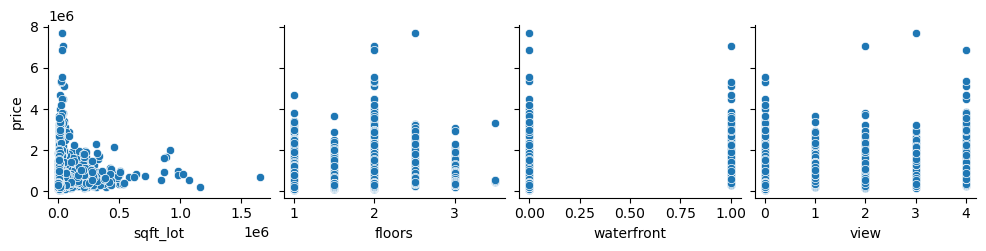

In [22]:
# pairplot of certain features from the dataset vs. price 
sns.pairplot(data=df1, x_vars=['sqft_lot','floors','waterfront','view'], y_vars=['price']);

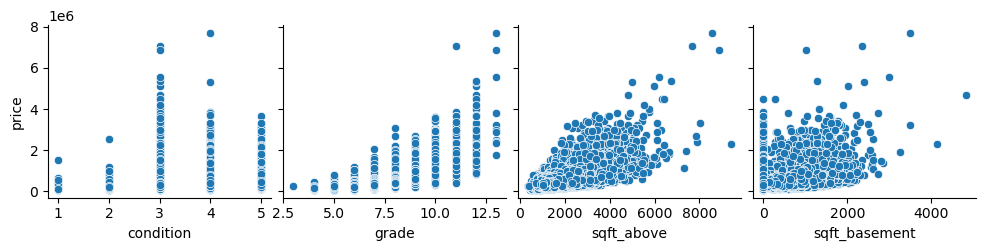

In [23]:
# pairplot of certain features from the dataset vs. price 
sns.pairplot(data=df1, x_vars=['condition','grade','sqft_above', 'sqft_basement'], y_vars=['price']);

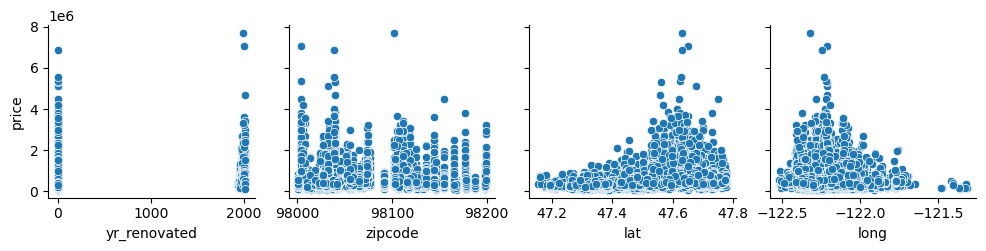

In [24]:
# pairplot of certain features from the dataset vs. price 
sns.pairplot(data=df1, x_vars=['yr_renovated','zipcode','lat','long'], y_vars=['price']);

**Testing for Linearity**

- Among the variables analyzed, the following exhibit clear linearity: bathrooms, sqft living, sqft above, and sqft basement.
- Although bedrooms do show some indication of linearity, there is a presence of a highly skewed tail in the data distribution.
- The remaining variables either display an even distribution along the x-axis or are categorical variables, which may not exhibit a linear relationship with the target variable.

## Baseline Model

In [25]:
# Define the variables
X = df1.drop(columns = ['date','price'])
y = df1.price

# Add a constant term
X = sm.add_constant(X)

#Fit the regression model
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     3328.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:03:41   Log-Likelihood:            -2.9201e+05
No. Observations:               21420   AIC:                         5.841e+05
Df Residuals:                   21404   BIC:                         5.842e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.792e+06    2.9e+06      3.379      0.001    4.11e+06    1.55e+07
bedrooms       -3.93e+04   1994.115    -19.708      0.000   -4.32e+04   -3.54e+04
bathrooms      4.303e+04   3285.481     13.098      0.000    3.66e+04    4.95e+04
sqft_living     115.5574      2.160     53.505      0.000     111.324     119.791
sqft_lot         -0.0608      0.035     -1.745      0.081      -0.129       0.008
floors         5462.4450   3590.554      1.521      0.128   -1575.309    1.25e+04
waterfront     6.119e+05   1.82e+04     33.677      0.000    5.76e+05    6.47e+05
view           5.508e+04   2106.208     26.153      0.000     5.1e+04    5.92e+04
condition      2.671e+04   2363.986     11.299      0.000    2.21e+04    3.13e+04
grade          1.007e+05   2083.746     48.330      0.000    9.66e+04    1.05e+05
sqft_above       74.8231      2.153     34.755      0.000      70.603      79.043
sqft_basement    40.7362      2.663     15.295      0.000      35.516      45.956
yr_built      -2654.0427     72.339    -36.689      0.000   -2795.833   -2512.252
yr_renovated     22.8306      3.993      5.717      0.000      15.003      30.658
zipcode        -609.7372     33.069    -18.439      0.000    -674.554    -544.920
lat            6.048e+05   1.08e+04     56.098      0.000    5.84e+05    6.26e+05
long           -2.11e+05    1.3e+04    -16.201      0.000   -2.37e+05   -1.85e+05
==============================================================================
Omnibus:                    17894.780   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1696533.480
Skew:                           3.483   Prob(JB):                         0.00
Kurtosis:                      46.039   Cond. No.                     1.08e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.81e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The Ordinary Least Squares (OLS) regression results indicate a model fit with an R-squared value of 0.700, suggesting that the independent variables explain approximately 70% of the variation in the dependent variable, 'price'. The adjusted R-squared value remains the same at 0.700, implying that the inclusion of additional variables did not significantly affect the model's explanatory power.

The model includes 15 independent variables: 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', and 'long'.

Among the coefficients, 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', and 'long' are statistically significant (p < 0.05), indicating a significant relationship with the 'price' variable.

Notably, the 'bedrooms' coefficient suggests that an increase in the number of bedrooms is associated with a decrease in price, while 'bathrooms', 'sqft_living', and 'sqft_above' show positive associations with price. Variables such as 'waterfront', 'view', 'condition', 'grade', and 'yr_renovated' also display positive relationships with price.

The model's overall significance is supported by the F-statistic of 3328.0, with a p-value of 0.00, indicating that at least one independent variable has a significant effect on the dependent variable.

The presence of a high skewness value (3.483) and a significant kurtosis value (46.039) suggests departures from normality in the model's residuals. Further investigation and potential transformations might be necessary to improve the model's goodness of fit.

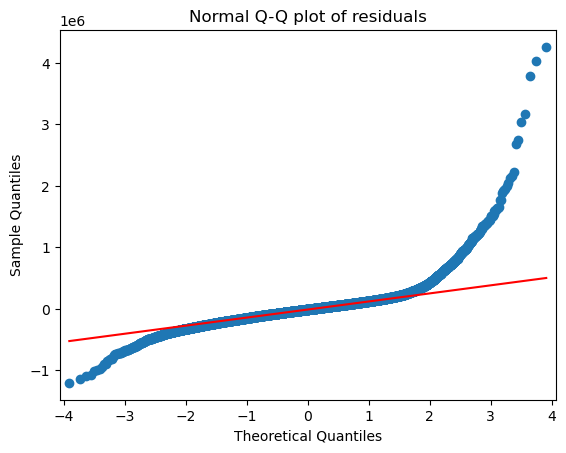

In [26]:
# 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

Heavy tails observed in the Q-Q plot, it suggests that the data has extreme values or outliers that deviate significantly from the expected distribution. These heavy tails indicate that the observed data has more extreme values than what would be expected under the assumed distribution.

**Visualize the error term for variance and heteroscedasticity and checking the normaility by QQ-plot**

R-Squared: 0.49262884665763296
Intercept     -44749.224173
sqft_living      281.061570
dtype: float64


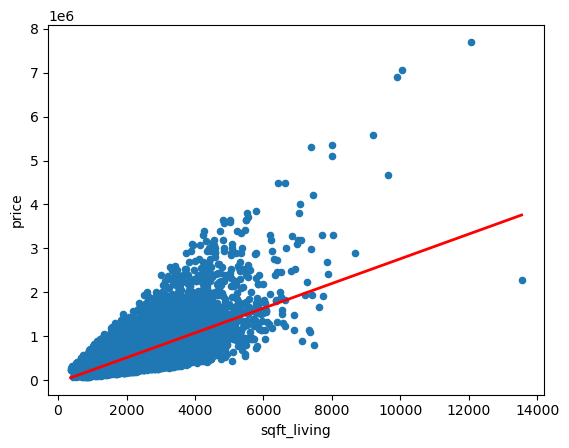

eval_env: 1


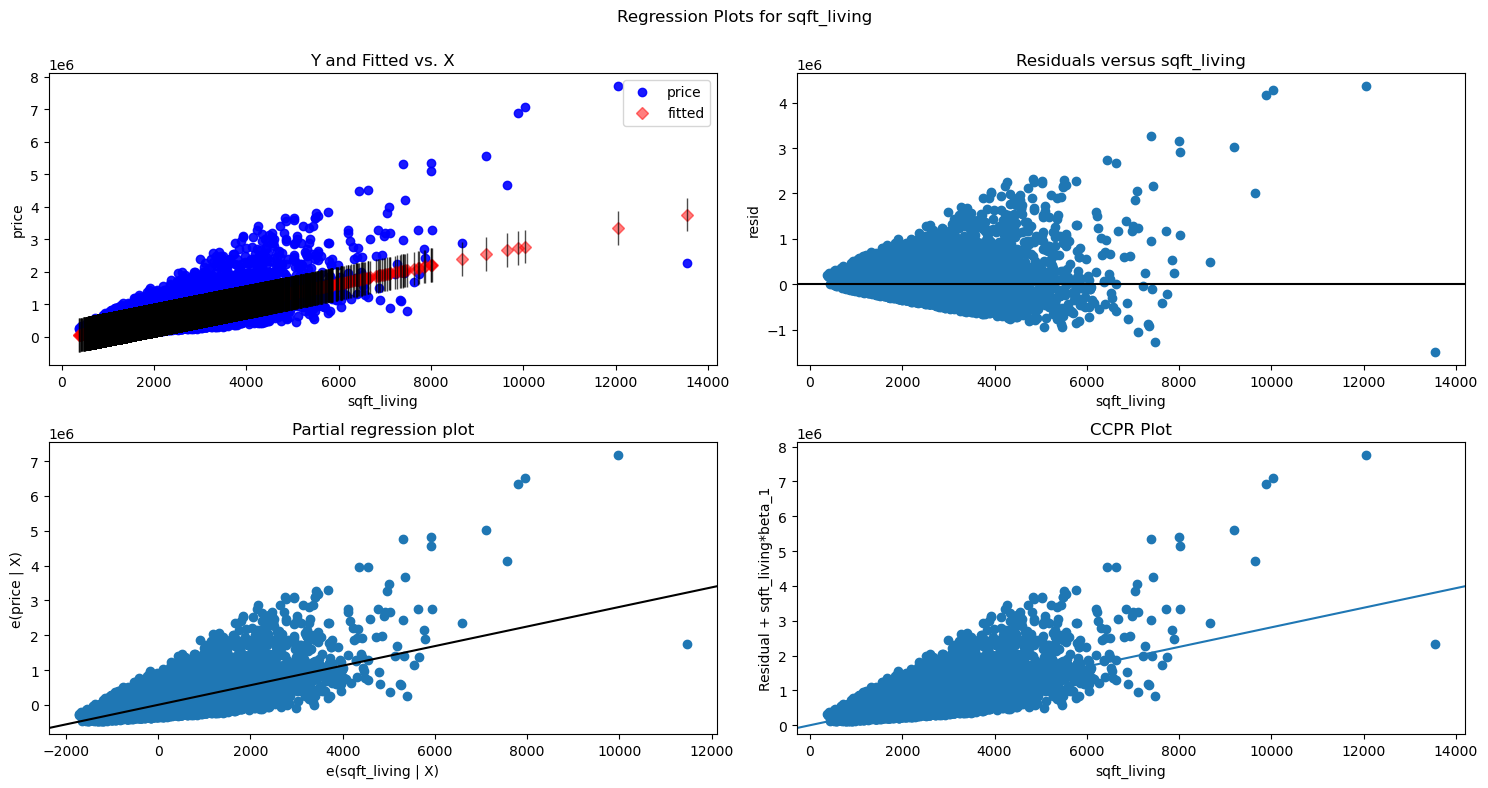

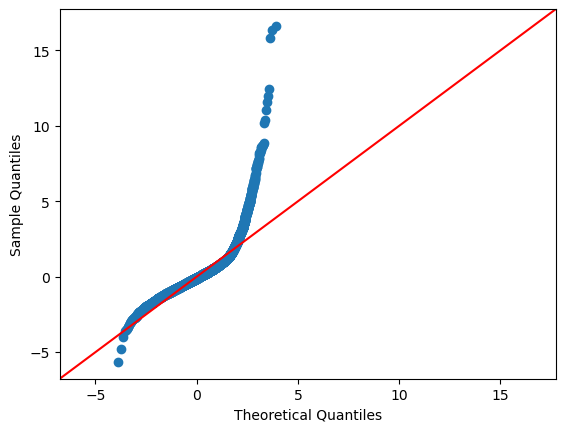

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
f = 'price~sqft_living'
model = smf.ols(formula=f, data=df1).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
# create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'sqft_living': [df1.sqft_living.min(), df1.sqft_living.max()]});

# make predictions for those x values and store them
preds = model.predict(X_new)
df1.plot(kind='scatter', x='sqft_living', y='price');

# first, plot the observed data and the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()

# Visualize the error term for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

# Check the normality assumptions by creating a QQ-plot
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

**Observations:**
- R-squared value: 0.49, suggesting 'sqft_living' significantly influences the dependent variable.
- Intercept: -44,749.22, not practically meaningful due to unrealistic scenario (zero sqft_living).
- Coefficient for 'sqft_living': 281.06, each sqft increase adds $281.06 to predicted value.
- Positive linear regression: As sqft_living increases, price tends to increase.
- Heteroscedasticity: Residuals' variability not constant across 'sqft_living' levels.
- QQ plot shows heavy tails: Presence of outliers or extreme values.
- Addressing heteroscedasticity and heavy-tails can improve model accuracy and reliability.

R-Squared: 0.10030775749464116
Intercept    105521.542150
bedrooms     129047.127037
dtype: float64


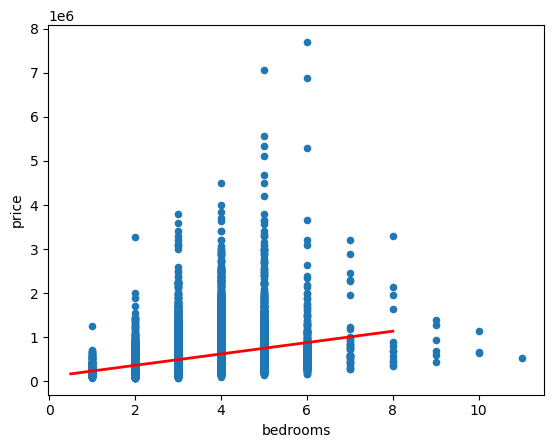

eval_env: 1


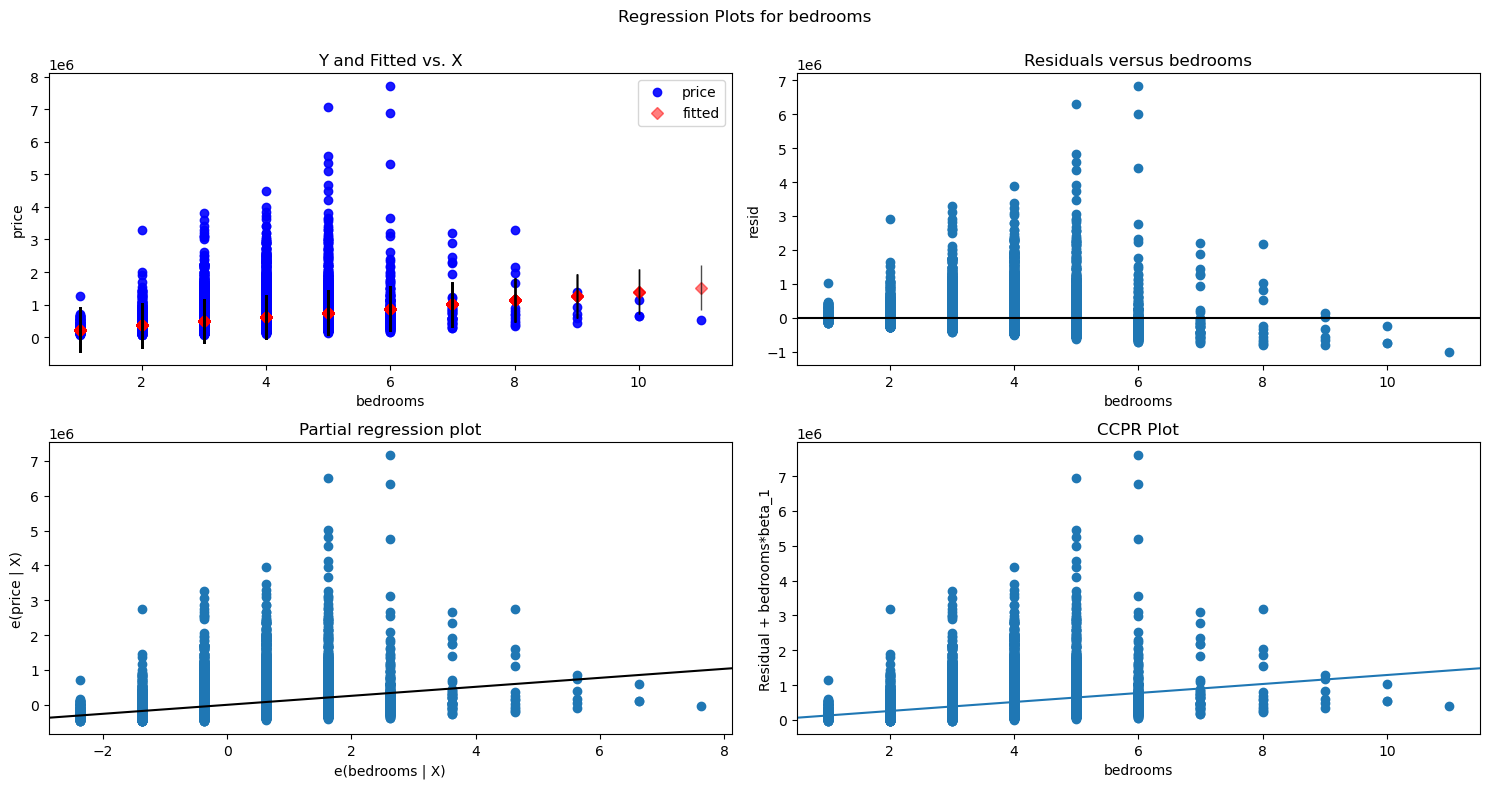

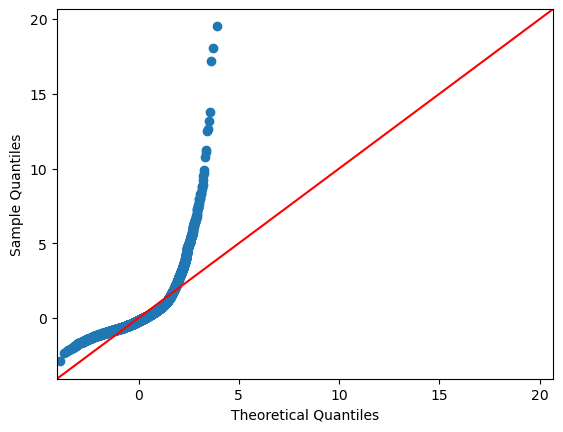

In [28]:
f = 'price~bedrooms'
model = smf.ols(formula=f, data=df1).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
# create a DataFrame with the minimum and maximum values of bathrooms
X_new = pd.DataFrame({'bedrooms': [df1.bathrooms.min(), df1.bathrooms.max()]});

# make predictions for those x values and store them
preds = model.predict(X_new)
df1.plot(kind='scatter', x='bedrooms', y='price');

# first, plot the observed data and the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()

# Visualize the error term for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

# Check the normality assumptions by creating a QQ-plot
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

**Observations:**
- R-squared: 0.49, 'sqft_living' significantly impacts dependent variable.
- Intercept: -44,749.22, impractical due to zero sqft_living.
- Coefficient for 'sqft_living': 281.06, each sqft adds $281.06 to predicted value.
- Positive linear regression: Price increases with sqft_living.
- Heteroscedasticity: Residuals vary across 'sqft_living' levels.
- Residual QQ plot shows heavy tails: Presence of outliers or extreme values.
- Improving accuracy: Address heteroscedasticity and heavy-tails.

R-Squared: 0.0012095557094251586
Intercept    473596.912914
condition     19685.323032
dtype: float64


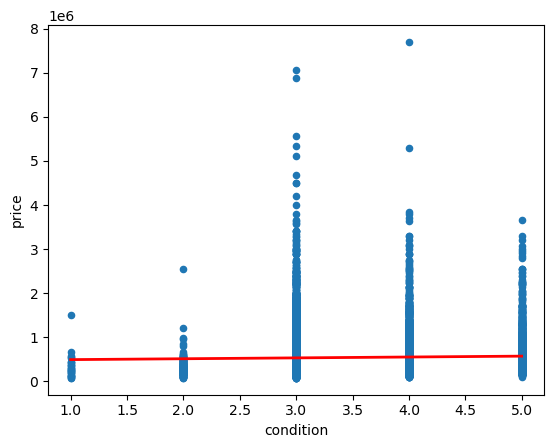

eval_env: 1


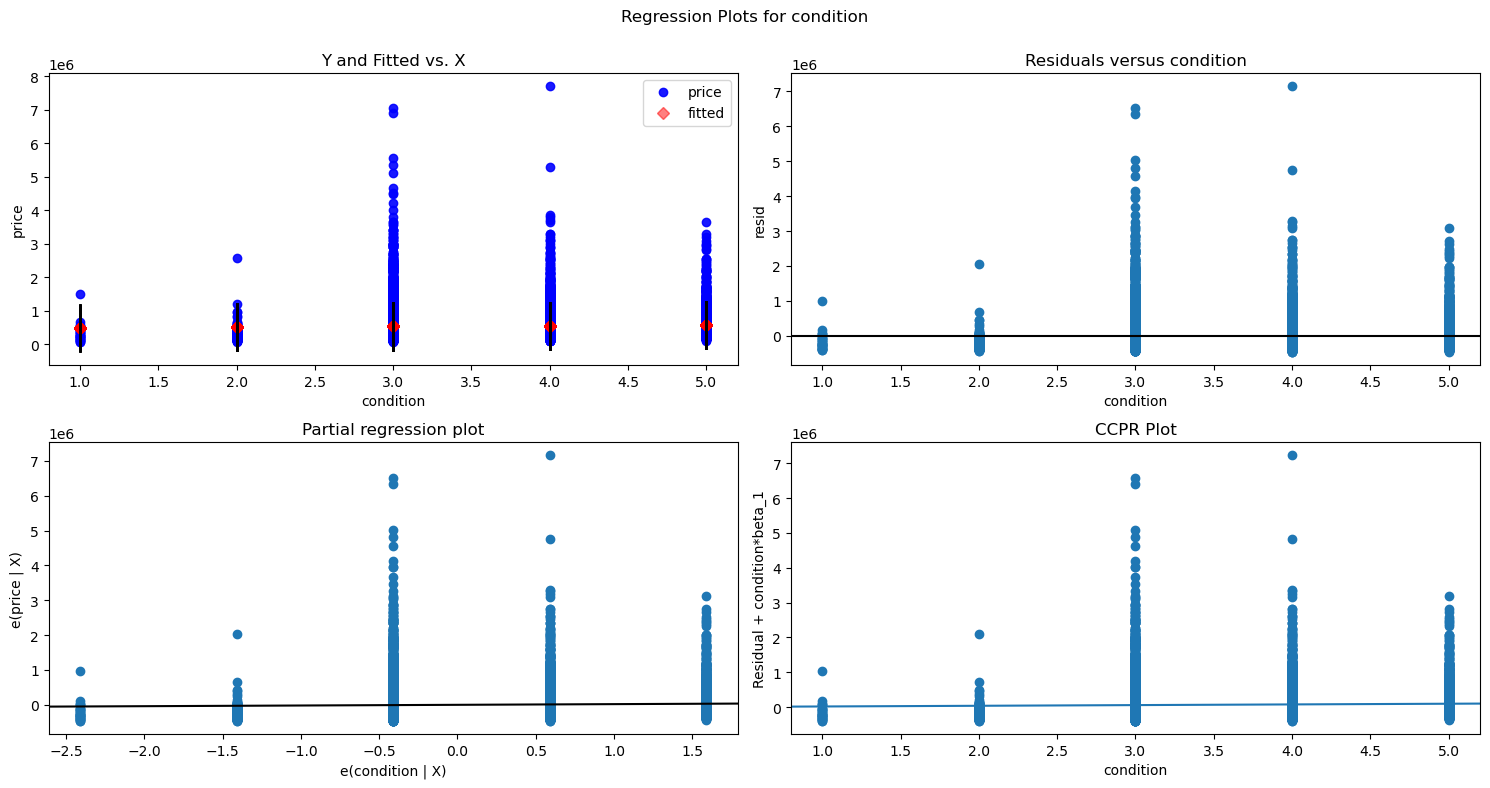

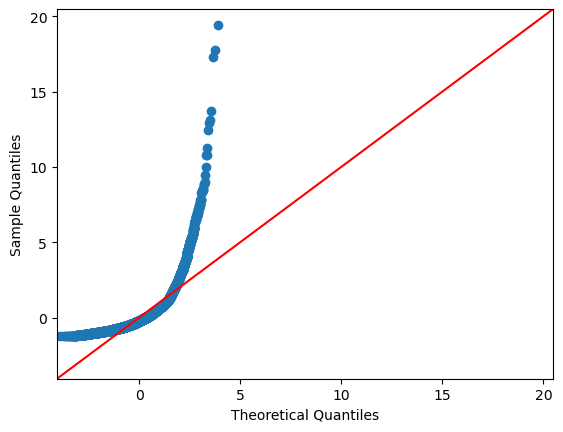

In [29]:
f = 'price~condition'
model = smf.ols(formula=f, data=df1).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
# create a DataFrame with the minimum and maximum values of condition
X_new = pd.DataFrame({'condition': [df1.condition.min(), df1.condition.max()]});

# make predictions for those x values and store them
preds = model.predict(X_new)
df1.plot(kind='scatter', x='condition', y='price');

# first, plot the observed data and the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()

# Visualize the error term for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

# Check the normality assumptions by creating a QQ-plot
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

**Observations:**

The R-squared value of 0.0012095557094251586 indicates that only a very small portion (approximately 0.12%) of the variation in the dependent variable is explained by the independent variable 'condition'. This suggests that the 'condition' variable has limited predictive power in determining the values of the dependent variable.

The intercept term of 473,596.912914 represents the estimated value of the dependent variable when the 'condition' variable is zero. However, keep in mind that having a condition level of zero is not a meaningful scenario in this context, so the interpretation of the intercept may not hold practical significance.

The coefficient of 19,685.323032 for 'condition' suggests that, on average, an increase of one unit in the 'condition' variable is associated with an increase of approximately $19,685.32 in the predicted value of the dependent variable, holding all other variables constant. This coefficient provides an estimate of the average impact of 'condition' on the response variable.

It is important to note that with such a low R-squared value, the 'condition' variable may not be a significant predictor of the dependent variable on its own. It may be necessary to consider additional variables or interactions to better understand the relationship between 'condition' and the dependent variable.

## Model Building
***

To enhance the model's performance, feature engineering techniques can be employed. Firstly, by assessing multicollinearity, we can identify any independent variables that exhibit high correlation with each other. These variables can be removed to mitigate issues arising from multicollinearity, which can adversely affect the model's accuracy.

Additionally, creating dummy variables can help represent categorical variables in a more meaningful way. This enables the model to capture the effects of different categories separately, potentially improving its predictive power. Furthermore, applying log transformations to certain variables, such as those with skewed distributions, can help address non-linearity and improve the model's linearity assumptions. Log transformations can also enable more interpretable coefficient estimates, as they can be interpreted as approximate percentage changes.

By incorporating these feature engineering techniques, the model can potentially benefit from improved variable representation, reduced multicollinearity, and enhanced linearity assumptions. These enhancements, in turn, have the potential to improve the model's predictive accuracy and provide more meaningful insights into the relationships between the independent variables and the target variable.ough model building, i am going to use multicollinaeity to check if there are any independent vaiable thats correlates to each other and remove it

### Multicollinearity

In [30]:
# creating correlation matrix between columns
df1.corr()

C:\Users\Thai Ha\AppData\Local\Temp\ipykernel_18996\772359334.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.316714   0.526229     0.701875  0.089111  0.256286   
bedrooms       0.316714  1.000000   0.528917     0.594221  0.033638  0.183570   
bathrooms      0.526229  0.528917   1.000000     0.755522  0.087779  0.501803   
sqft_living    0.701875  0.594221   0.755522     1.000000  0.172586  0.352868   
sqft_lot       0.089111  0.033638   0.087779     0.172586  1.000000 -0.005561   
floors         0.256286  0.183570   0.501803     0.352868 -0.005561  1.000000   
waterfront     0.264898 -0.002132   0.063635     0.104737  0.021429  0.020578   
view           0.393113  0.080772   0.184949     0.280839  0.075360  0.027175   
condition      0.034779  0.022743  -0.129362    -0.061677 -0.009169 -0.266859   
grade          0.668020  0.367750   0.665587     0.762477  0.113656  0.458091   
sqft_above     0.605294  0.493566   0.686328     0.876533  0.183210  0.522751   
sqft_basement  0.323536  0.309253   0.283205     0.434505  0.015239 -0.246078   
yr_built       0.052906  0.160365   0.506252     0.316646  0.052312  0.488935   
yr_renovated   0.118484  0.018196   0.047686     0.050851  0.004991  0.003141   
zipcode       -0.052371 -0.159637  -0.203884    -0.198995 -0.129422 -0.058532   
lat            0.305744 -0.012974   0.023143     0.050739 -0.085822  0.048900   
long           0.020983  0.137018   0.223808     0.240212  0.230265  0.124812   

               waterfront      view  condition     grade  sqft_above  \
price            0.264898  0.393113   0.034779  0.668020    0.605294   
bedrooms        -0.002132  0.080772   0.022743  0.367750    0.493566   
bathrooms        0.063635  0.184949  -0.129362  0.665587    0.686328   
sqft_living      0.104737  0.280839  -0.061677  0.762477    0.876533   
sqft_lot         0.021429  0.075360  -0.009169  0.113656    0.183210   
floors           0.020578  0.027175  -0.266859  0.458091    0.522751   
waterfront       1.000000  0.381654   0.016608  0.082905    0.071737   
view             0.381654  1.000000   0.044678  0.247632    0.165289   
condition        0.016608  0.044678   1.000000 -0.150508   -0.161483   
grade            0.082905  0.247632  -0.150508  1.000000    0.756221   
sqft_above       0.071737  0.165289  -0.161483  0.756221    1.000000   
sqft_basement    0.083060  0.273358   0.174204  0.166854   -0.052672   
yr_built        -0.024842 -0.056171  -0.365129  0.446235    0.422977   
yr_renovated     0.074096  0.089982  -0.056264  0.015744    0.020078   
zipcode          0.029183  0.087334   0.004372 -0.183588   -0.260803   
lat             -0.012267  0.005835  -0.015566  0.112815   -0.002040   
long            -0.037883 -0.079019  -0.107154  0.198555    0.344161   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323536  0.052906      0.118484 -0.052371  0.305744   
bedrooms            0.309253  0.160365      0.018196 -0.159637 -0.012974   
bathrooms           0.283205  0.506252      0.047686 -0.203884  0.023143   
sqft_living         0.434505  0.316646      0.050851 -0.198995  0.050739   
sqft_lot            0.015239  0.052312      0.004991 -0.129422 -0.085822   
floors             -0.246078  0.488935      0.003141 -0.058532  0.048900   
waterfront          0.083060 -0.024842      0.074096  0.029183 -0.012267   
view                0.273358 -0.056171      0.089982  0.087334  0.005835   
condition           0.174204 -0.365129     -0.056264  0.004372 -0.015566   
grade               0.166854  0.446235      0.015744 -0.183588  0.112815   
sqft_above         -0.052672  0.422977      0.020078 -0.260803 -0.002040   
sqft_basement       1.000000 -0.134532      0.067930  0.075163  0.109081   
yr_built           -0.134532  1.000000     -0.203147 -0.346162 -0.148857   
yr_renovated        0.067930 -0.203147      1.000000  0.062291  0.027776   
zipcode             0.075163 -0.346162      0.062291  1.000000  0.266712   
lat                 0.109081 -0.148857      0.

C:\Users\Thai Ha\AppData\Local\Temp\ipykernel_18996\2092717236.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), center=0)


<Axes: >

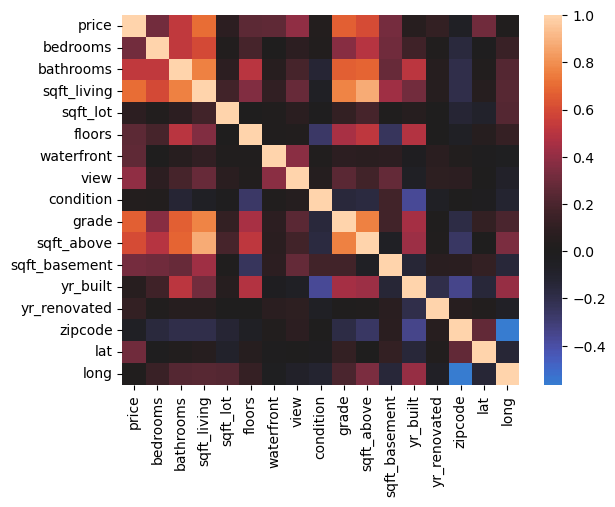

In [31]:
# Creating heatmap to visualise the correlation matrix 
sns.heatmap(df1.corr(), center=0)

In [32]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

C:\Users\Thai Ha\AppData\Local\Temp\ipykernel_18996\4221649028.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)


In [33]:
df[(df.cc>.75) & (df.cc <1)]

cc
pairs                              
(sqft_living, sqft_above)  0.876533
(sqft_living, grade)       0.762477
(sqft_above, grade)        0.756221
(sqft_living, bathrooms)   0.755522

### Creating dummies

In [34]:
# Creating catergorical dummy variables for bedrooms, diving into up to 2 bedrooms, up to 4 bedrooms and more than 4
df1['bedroom_category'] = df1['bedrooms'].apply(lambda x: 1 if x <= 2 else 2 if 2 < x <= 4 else 3)

# Creating dummies for condition levels into 1-2, 2-3, 3-4 and above 4
df1['condition_category'] = df1['condition'].apply(lambda x: 1 if x <= 2 else 2 if 2 < x <= 3 else 3 if 3 < x <= 4
                                                   else 4)
# Adding the categorical dummies into columns
df1 = pd.get_dummies(df1, columns = ['bedroom_category','condition_category'], prefix = ['bedroom_category',
                                                                                         'condition_category'],drop_first=True)
# Dropping unnesscary columns
df1 = df1.drop(columns = ["bedrooms", "condition"])

In [35]:
# Creating these columns into binary variable category
df1["two_plus_floors"] = df1.floors.apply(lambda x: 1 if x >= 2 else 0)
df1["have_view"] = df1.view.apply(lambda x: 1 if x >= 1 else 0)
df1["have_waterfront"] = df1.waterfront.apply(lambda x: 1 if x >= 1 else 0)
df1["is_renovated"] = df1.yr_renovated.apply(lambda x: 1 if x >= 1 else 0)

In [36]:
# Renaming columns for better understanding
df1 = df1.rename(columns = {'bedroom_category_2':'bedroom_2_4','bedroom_category_3':'bedroom_plus4',
                           'condition_category_2':'condition_below_avg','condition_category_3':'condition_above_avg',
                           'condition_category_4':'condition_good'})

In [37]:
# Dropping unnesscary columns
df1 = df1.drop(columns = ['date','floors','waterfront','view','yr_renovated'])

In [38]:
# Dropping columns to remove multicollinearity
# also decided to drop sqft_lot15 as it only related to neighbouring feature
df1 = df1.drop(columns = ["sqft_above", "grade", "bathrooms"])

C:\Users\Thai Ha\AppData\Local\Temp\ipykernel_18996\4271794803.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price']);


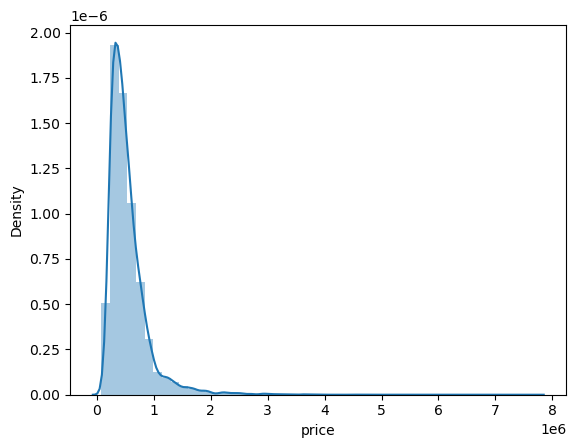

In [39]:
sns.distplot(df1['price']);

### Log Transformation

C:\Users\Thai Ha\AppData\Local\Temp\ipykernel_18996\3466316619.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_scaled_price);


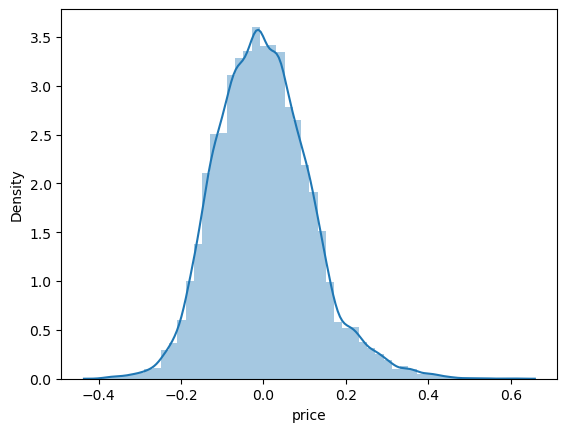

In [40]:
TransformPrice = np.log(df1['price'])

df1['TransformPrice'] = TransformPrice

df1_scaled_price = (TransformPrice - np.mean(TransformPrice)) / (max(TransformPrice) - min(TransformPrice))

df1["scaled_price"] = df1_scaled_price

sns.distplot(df1_scaled_price);

C:\Users\Thai Ha\AppData\Local\Temp\ipykernel_18996\975056428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['sqft_living']);


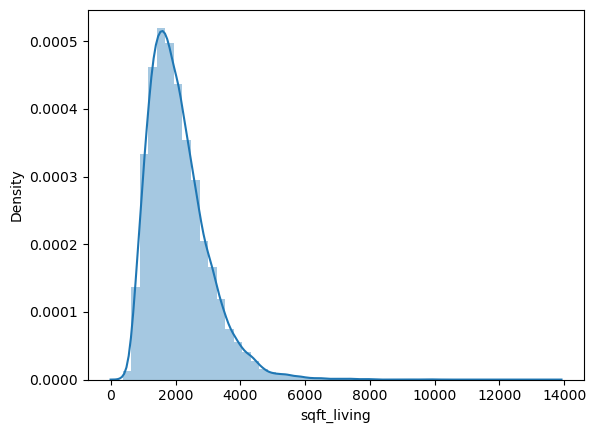

In [41]:
sns.distplot(df1['sqft_living']);

C:\Users\Thai Ha\AppData\Local\Temp\ipykernel_18996\1558462989.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_TransformLiving);


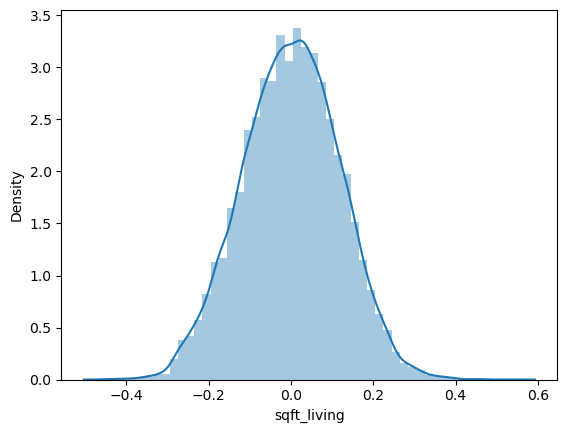

In [42]:
TransformLiving = np.log(df1['sqft_living'])

df1_TransformLiving = (TransformLiving - np.mean(TransformLiving)) / (max(TransformLiving) - min(TransformLiving))

df1["sqft_living"] = df1_TransformLiving

sns.distplot(df1_TransformLiving);

In [43]:
# Define the variables
X = df1.drop(columns = ['price','scaled_price','TransformPrice'])
y = df1.TransformPrice

# Add a constant term
X = sm.add_constant(X)

#Fit the regression model
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TransformPrice   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     3175.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:03:48   Log-Likelihood:                -3637.5
No. Observations:               21420   AIC:                             7309.
Df Residuals:                   21403   BIC:                             7445.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.4521      4.110     -0.840      0.401     -11.507       4.603
sqft_living             2.9813      0.028    107.580      0.000       2.927       3.036
sqft_lot             4.913e-07   4.95e-08      9.931      0.000    3.94e-07    5.88e-07
sqft_basement       -5.805e-05   6.03e-06     -9.625      0.000   -6.99e-05   -4.62e-05
yr_built               -0.0018   9.88e-05    -18.587      0.000      -0.002      -0.002
zipcode                -0.0009   4.71e-05    -19.618      0.000      -0.001      -0.001
lat                     1.6177      0.015    107.661      0.000       1.588       1.647
long                   -0.2762      0.018    -15.106      0.000      -0.312      -0.240
bedroom_2_4            -0.1253      0.007    -18.755      0.000      -0.138      -0.112
bedroom_plus4          -0.1662      0.010    -16.492      0.000      -0.186      -0.146
condition_below_avg     0.1713      0.021      8.079      0.000       0.130       0.213
condition_above_avg     0.2172      0.021     10.207      0.000       0.175       0.259
condition_good          0.2875      0.022     13.015      0.000       0.244       0.331
two_plus_floors         0.1132      0.006     19.318      0.000       0.102       0.125
have_view               0.2650      0.007     36.682      0.000       0.251       0.279
have_waterfront         0.5154      0.025     20.883      0.000       0.467       0.564
is_renovated            0.0954      0.011      8.437      0.000       0.073       0.118
==============================================================================
Omnibus:                      209.950   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.707
Skew:                           0.093   Prob(JB):                     3.77e-70
Kurtosis:                       3.569   Cond. No.                     2.09e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

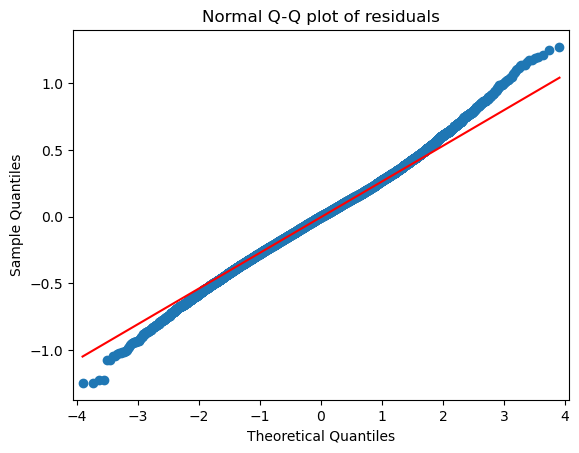

In [44]:
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

**Observations:**
- R-squared: 0.704, explains 70.4% variation in 'TransformPrice'.
- Adjusted R-squared: 0.703, considers variable count and sample size.
- F-statistic: 3175.0 (p-value: 0.00), model is statistically significant.
- Coefficients: Effect of variables on 'TransformPrice' when others are constant.'sqft_living' is associated with an approximate increase of 2.9813 in the predicted value of 'TransformPrice'. Similarly, a one-unit increase in 'sqft_lot' corresponds to a very small increase in 'TransformPrice', as indicated by the coefficient of 4.913e-07.
- Positive coefficients: On the other hand, variables such as 'have_waterfront' and 'two_plus_floors' have positive coefficients, indicating that having these features is associated with an increase in 'TransformPrice'.
- Negative coefficients: 'bedroom_category_2', 'condition_category_3', and 'have_view', show negative coefficients, suggesting that being in these categories is associated with a decrease in 'TransformPrice
- t-tests: Assess significance of variable effects on 'TransformPrice'.

In [45]:
# build the formula 
f = 'TransformPrice~sqft_living'
# create a fitted model in one line
model = smf.ols(formula=f, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TransformPrice   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.791e+04
Date:                Fri, 21 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:03:49   Log-Likelihood:                -10153.
No. Observations:               21420   AIC:                         2.031e+04
Df Residuals:                   21418   BIC:                         2.033e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      13.0489      0.003   4913.102      0.000      13.044      13.054
sqft_living     3.0176      0.023    133.832      0.000       2.973       3.062
==============================================================================
Omnibus:                      122.420   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.634
Skew:                           0.141   Prob(JB):                     3.48e-25
Kurtosis:                       2.785   Cond. No.                         8.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared: 0.45541299795364
Intercept      13.048915
sqft_living     3.017613
dtype: float64


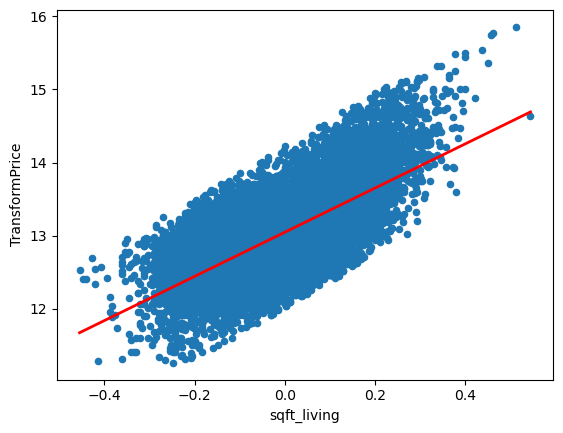

eval_env: 1


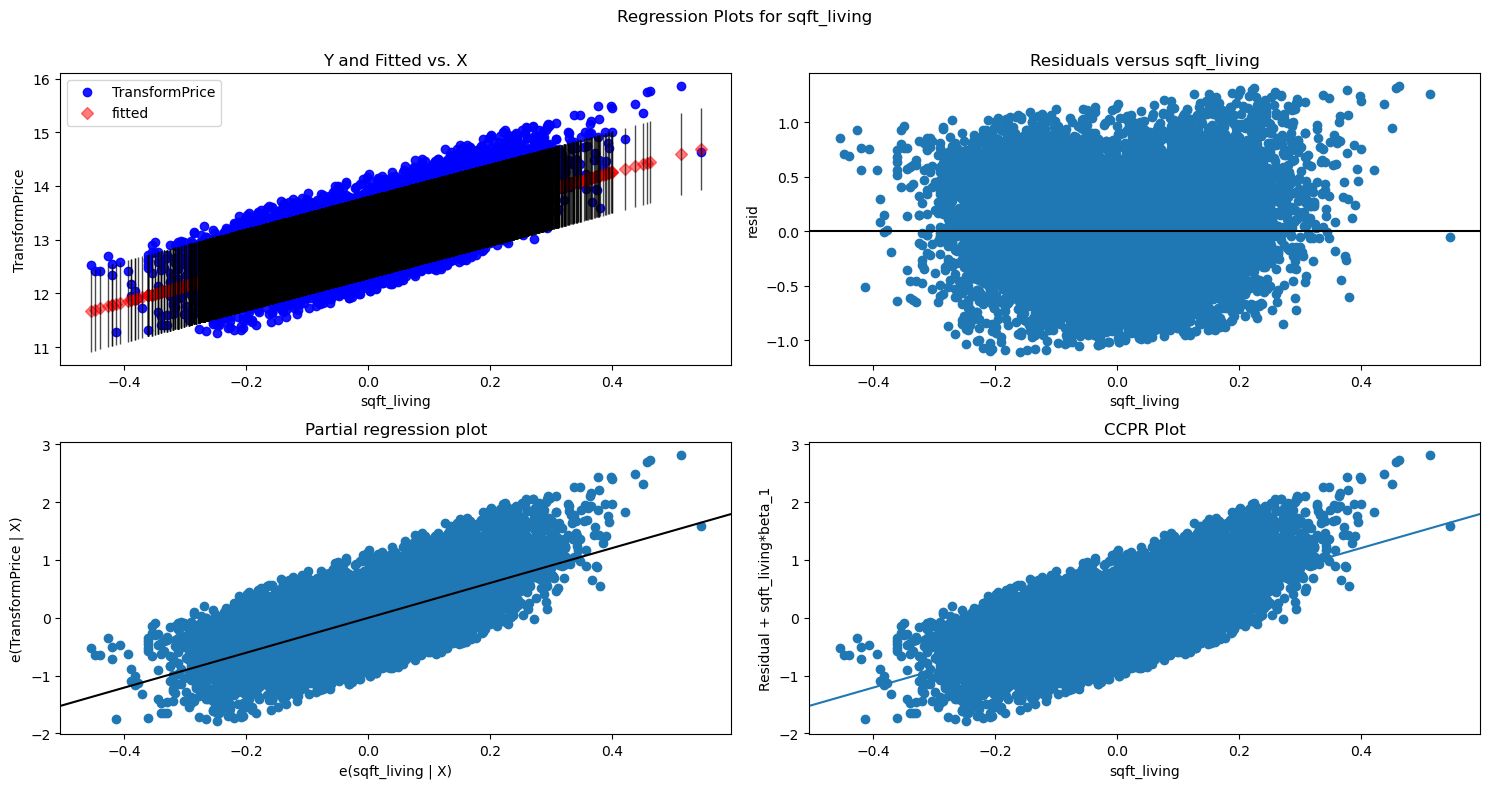

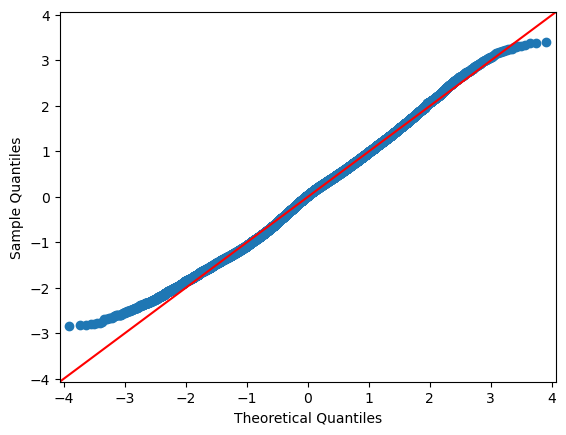

In [46]:
f = 'TransformPrice~sqft_living'
model = smf.ols(formula=f, data=df1).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
# create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'sqft_living': [df1.sqft_living.min(), df1.sqft_living.max()]});

# make predictions for those x values and store them
preds = model.predict(X_new)
df1.plot(kind='scatter', x='sqft_living', y='TransformPrice');

# first, plot the observed data and the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()

# Visualize the error term for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

# Check the normality assumptions by creating a QQ-plot

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

**Observations:**

- R-squared: 0.46, 'sqft_living' moderately impacts dependent variable.
- Intercept: 13.05, impractical interpretation due to zero sqft_living.
- Coefficient for 'sqft_living': 3.02, each sqft adds 3.02 to predicted value.
- The variable 'sqft_living' exhibits homoscedasticity.

In [47]:
# build the formula 
f = 'TransformPrice~is_renovated'
# create a fitted model in one line
model = smf.ols(formula=f, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TransformPrice   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     249.0
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           8.88e-56
Time:                        15:03:50   Log-Likelihood:                -16538.
No. Observations:               21420   AIC:                         3.308e+04
Df Residuals:                   21418   BIC:                         3.310e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0382      0.004   3580.216      0.000      13.031      13.045
is_renovated     0.3092      0.020     15.779      0.000       0.271       0.348
==============================================================================
Omnibus:                      781.699   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              995.562
Skew:                           0.408   Prob(JB):                    6.55e-217
Kurtosis:                       3.672   Cond. No.                         5.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared: 0.011491768621129994
Intercept       13.038234
is_renovated     0.309169
dtype: float64


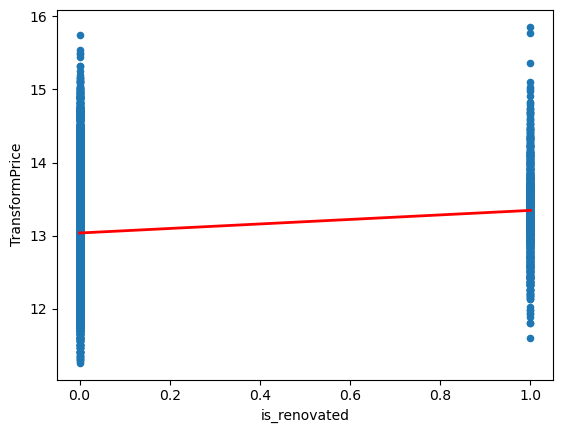

eval_env: 1


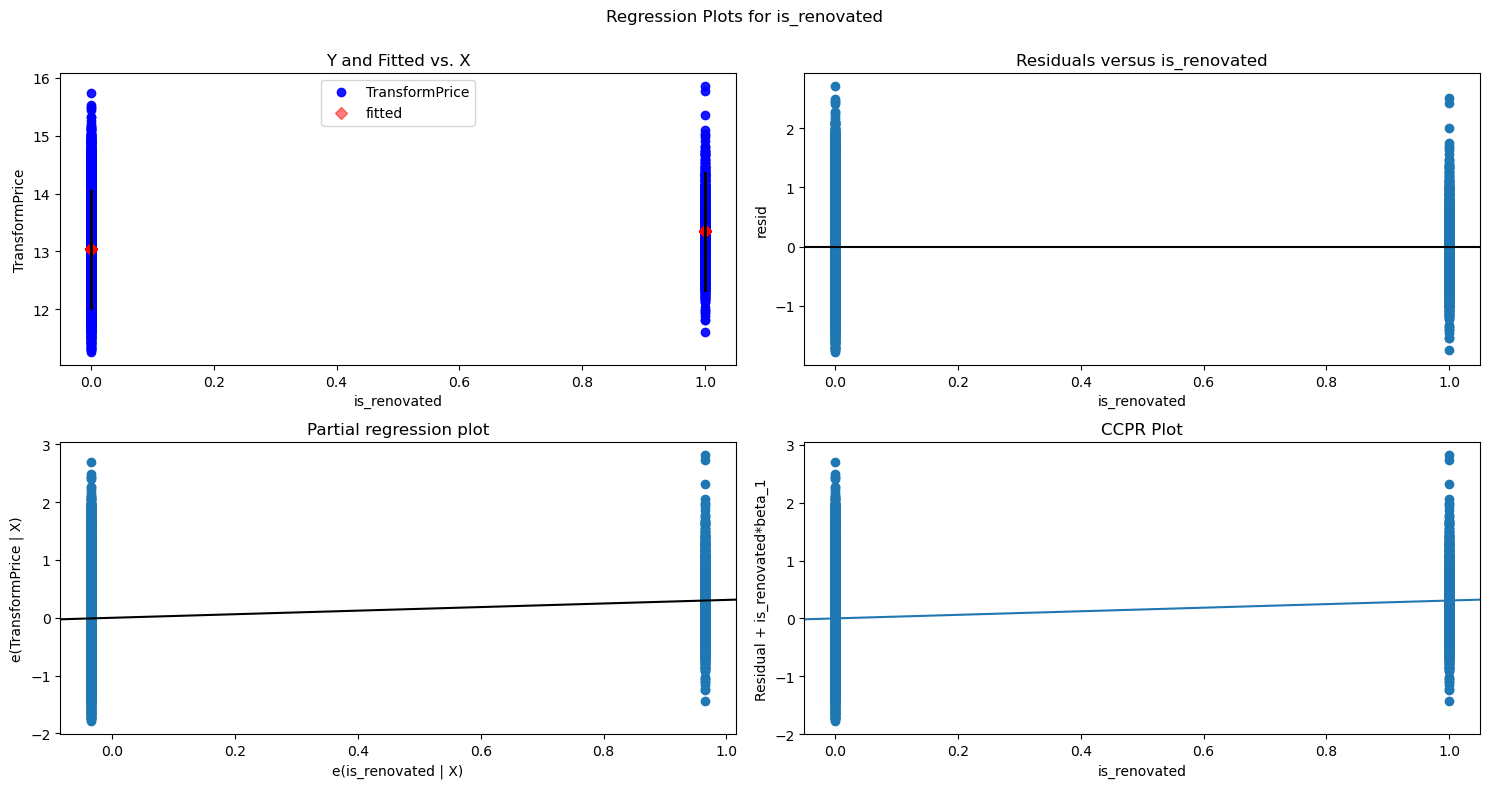

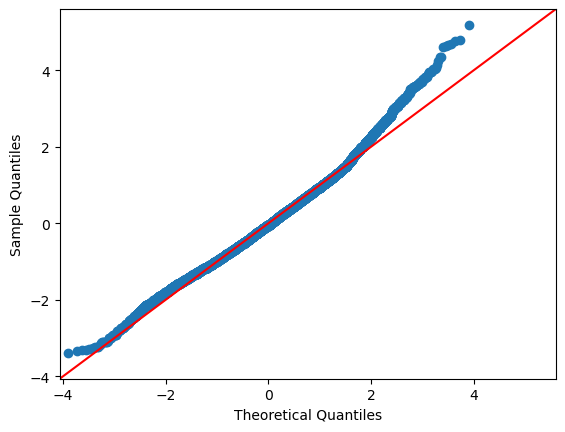

In [48]:
f = 'TransformPrice~is_renovated'
model = smf.ols(formula=f, data=df1).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
# create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'is_renovated': [df1.is_renovated.min(), df1.is_renovated.max()]});

# make predictions for those x values and store them
preds = model.predict(X_new)
df1.plot(kind='scatter', x='is_renovated', y='TransformPrice');

# first, plot the observed data and the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()

# Visualize the error term for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "is_renovated", fig=fig)
plt.show()

# Check the normality assumptions by creating a QQ-plot

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [53]:
# build the formula 
f = 'TransformPrice~condition_above_avg'
# create a fitted model in one line
model = smf.ols(formula=f, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TransformPrice   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     35.81
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           2.21e-09
Time:                        15:03:56   Log-Likelihood:                -16643.
No. Observations:               21420   AIC:                         3.329e+04
Df Residuals:                   21418   BIC:                         3.331e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              13.0618      0.004   3117.330      0.000      13.054      13.070
condition_above_avg    -0.0488      0.008     -5.984      0.000      -0.065      -0.033
==============================================================================
Omnibus:                      858.862   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1101.973
Skew:                           0.432   Prob(JB):                    5.12e-240
Kurtosis:                       3.699   Cond. No.                         2.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared: 0.0016690270549001296
Intercept              13.061784
condition_above_avg    -0.048849
dtype: float64


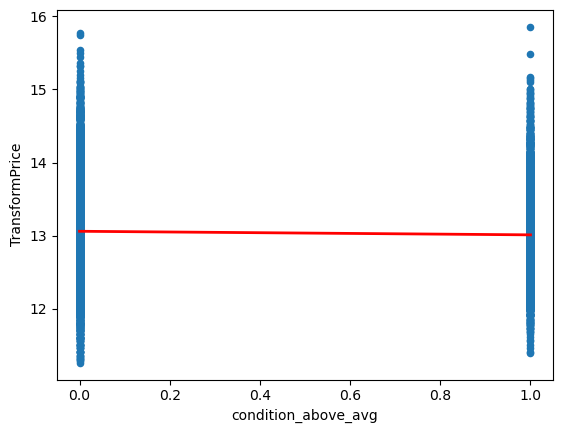

eval_env: 1


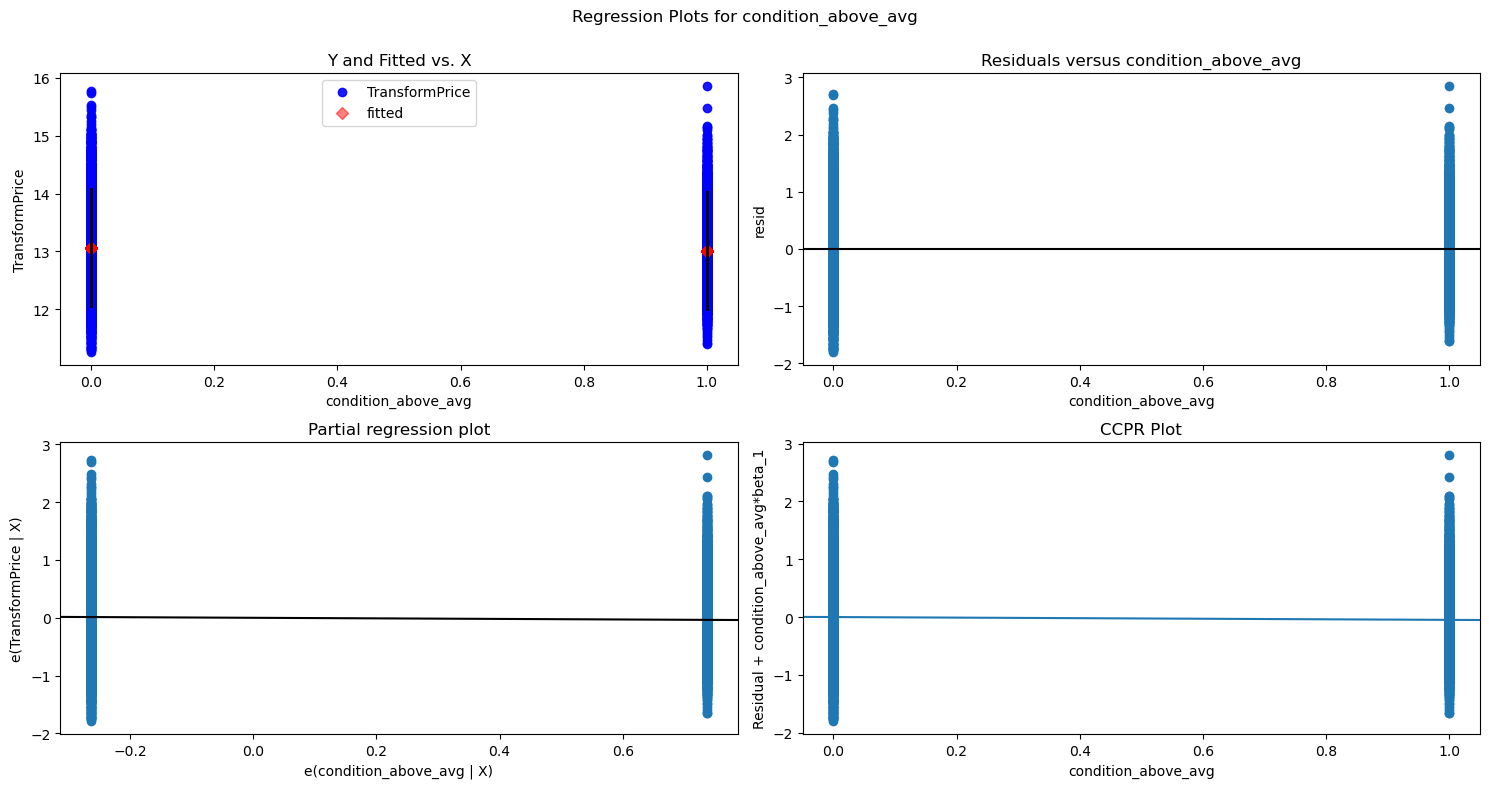

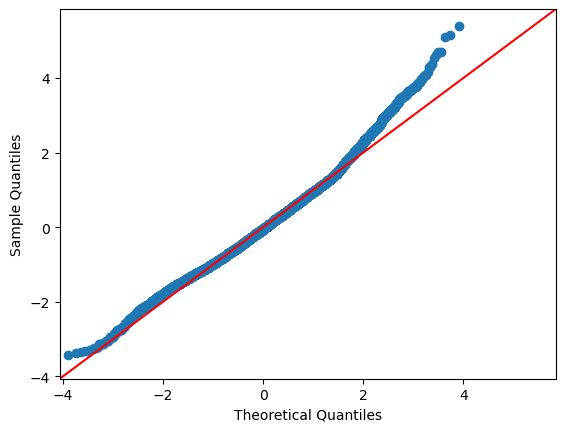

In [54]:
f = 'TransformPrice~condition_above_avg'
model = smf.ols(formula=f, data=df1).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
# create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'condition_above_avg': [df1.condition_above_avg.min(), df1.condition_above_avg.max()]});

# make predictions for those x values and store them
preds = model.predict(X_new)
df1.plot(kind='scatter', x='condition_above_avg', y='TransformPrice');

# first, plot the observed data and the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()

# Visualize the error term for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition_above_avg", fig=fig)
plt.show()

# Check the normality assumptions by creating a QQ-plot

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [55]:
# build the formula 
f = 'TransformPrice~condition_good'
# create a fitted model in one line
model = smf.ols(formula=f, data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         TransformPrice   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     77.10
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.74e-18
Time:                        15:03:58   Log-Likelihood:                -16623.
No. Observations:               21420   AIC:                         3.325e+04
Df Residuals:                   21418   BIC:                         3.327e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         13.0397      0.004   3483.770      0.000      13.032      13.047
condition_good     0.1171      0.013      8.781      0.000       0.091       0.143
==============================================================================
Omnibus:                      841.182   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1080.815
Skew:                           0.425   Prob(JB):                    2.01e-235
Kurtosis:                       3.698   Cond. No.                         3.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared: 0.0035868915734572626
Intercept         13.039691
condition_good     0.117111
dtype: float64


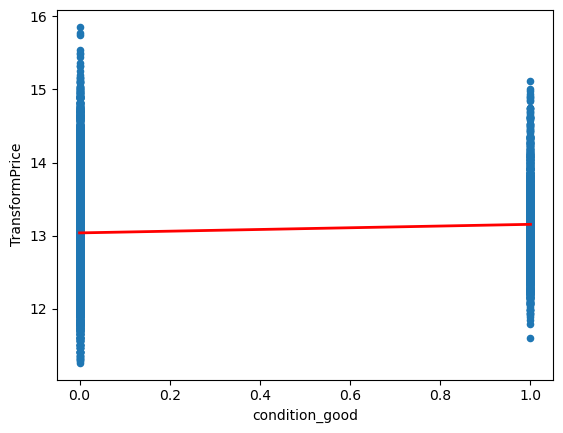

eval_env: 1


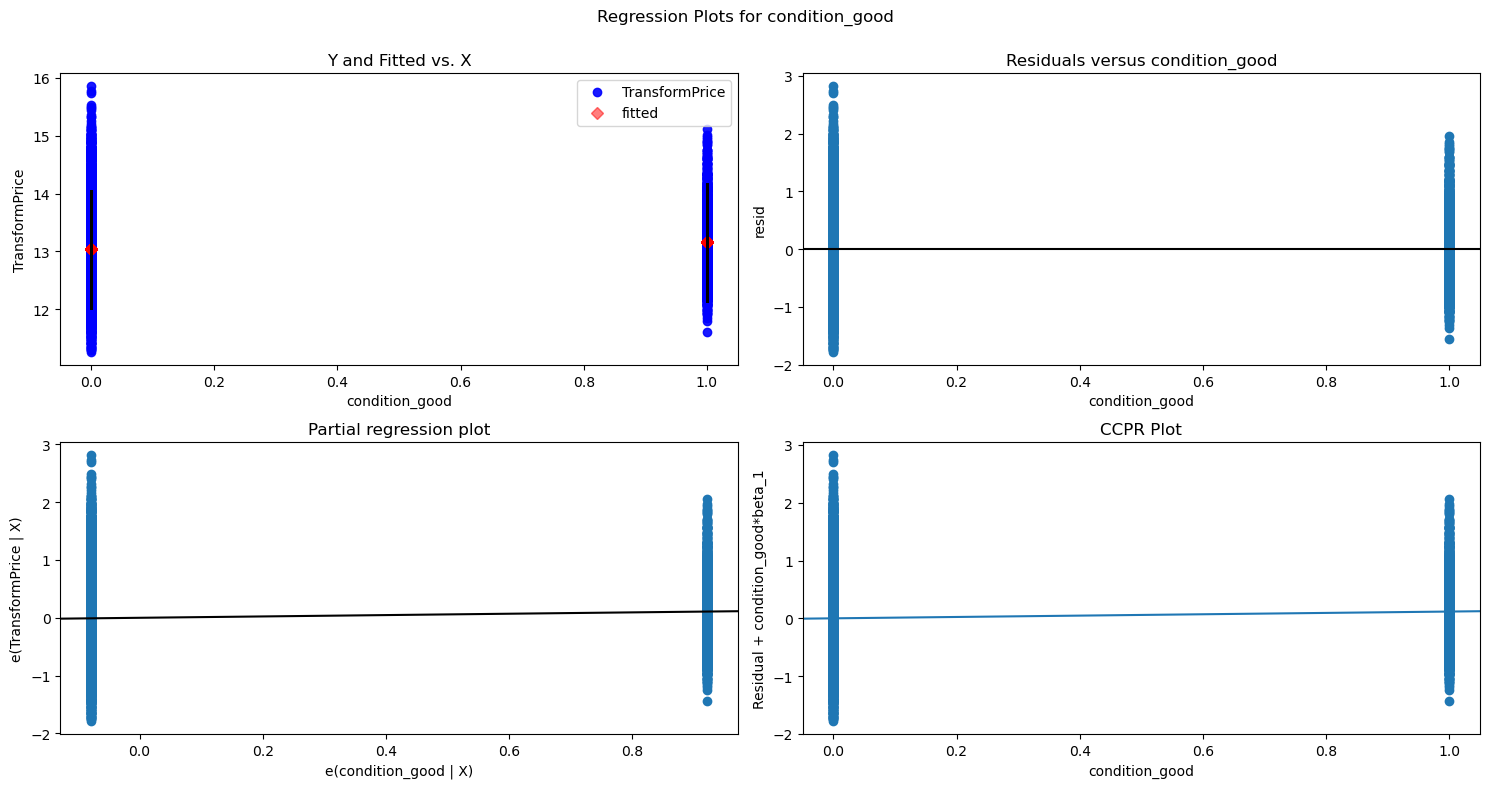

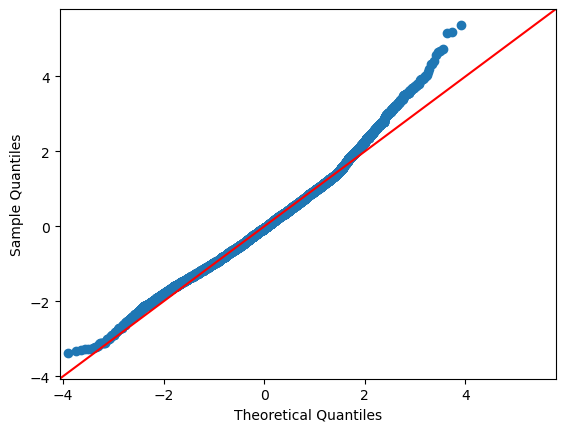

In [56]:
f = 'TransformPrice~condition_good'
model = smf.ols(formula=f, data=df1).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
# create a DataFrame with the minimum and maximum values of sqft_living
X_new = pd.DataFrame({'condition_good': [df1.condition_good.min(), df1.condition_good.max()]});

# make predictions for those x values and store them
preds = model.predict(X_new)
df1.plot(kind='scatter', x='condition_good', y='TransformPrice');

# first, plot the observed data and the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()

# Visualize the error term for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition_good", fig=fig)
plt.show()

# Check the normality assumptions by creating a QQ-plot

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

## Model Validation

To validate the model's performance, a train-test split methodology can be employed. The dataset can be divided into two subsets: a training set and a testing set. The training set, comprising 80% of the data, is used to train the model, while the remaining 20% serves as the testing set to evaluate the model's predictive capabilities.

By assessing the train mean squared error (MSE) and the test MSE, we can gain insights into the model's performance on both the training and testing data. The train MSE measures the average squared difference between the actual and predicted values on the training set. Similarly, the test MSE quantifies the average squared difference between the actual and predicted values on the testing set.

Comparing the train MSE and test MSE allows us to assess the model's ability to generalize to unseen data. Ideally, the test MSE should be comparable to or slightly higher than the train MSE. If the test MSE is significantly higher, it could indicate that the model is overfitting the training data and may not perform well on new observations.

Therefore, by examining the train and test MSE values, we can evaluate the model's performance, identify potential issues such as overfitting or underfitting, and make informed decisions on refining the model if necessary. The goal is to achieve a model that demonstrates low MSE values on both the training and testing sets, indicating good predictive accuracy and generalizability.

In [57]:
# Load libriaries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df1.drop(columns = ['price','scaled_price','TransformPrice'])
y = df1.TransformPrice

#train test split before the test
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = .2, random_state = 42)

In [58]:
model = LinearRegression()

In [59]:
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)

In [61]:
y_pred

array([12.50602183, 12.94711196, 12.75042085, ..., 12.97975913,
       12.60775996, 12.230344  ])

In [62]:
y_test

6132     12.729321
8993     13.429848
559      12.711383
11931    13.255144
15176    12.973863
           ...    
17165    13.530492
1034     13.795308
10296    12.765688
7671     12.611204
14487    12.052339
Name: TransformPrice, Length: 4284, dtype: float64

In [63]:
df = pd.DataFrame({'Actual Transformed Price': y_test, 'Prediction Transformed Price': y_pred})
df

Actual Transformed Price  Prediction Transformed Price
6132                  12.729321                     12.506022
8993                  13.429848                     12.947112
559                   12.711383                     12.750421
11931                 13.255144                     13.417611
15176                 12.973863                     13.069224
...                         ...                           ...
17165                 13.530492                     13.388470
1034                  13.795308                     13.729835
10296                 12.765688                     12.979759
7671                  12.611204                     12.607760
14487                 12.052339                     12.230344

[4284 rows x 2 columns]

The comparison between the actual and predicted transformed prices provides insights into the model's performance. Ideally, we aim for the predicted values to be as close to the actual values as possible. By visually inspecting and analyzing the differences between the actual and predicted transformed prices, we can assess how well the model captures the underlying patterns and variability in the data.

In [64]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [65]:
# Load libriaries
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.08244223453899263
Test Mean Squared Error: 0.08142489182634288


**Observations:**

The MSE is a measure of the average squared difference between the actual values and the predicted values from the model. A lower MSE indicates that the model's predictions are closer to the actual values, suggesting a better fit and higher accuracy.

In this case, the test MSE (0.08142489182634288) is slightly lower than the train MSE (0.08244223453899263). This implies that the model's performance on the test data is slightly better than on the training data. Generally, a similar or slightly lower test MSE compared to the train MSE is a positive sign, as it indicates that the model has not overfit the training data and can generalize well to new, unseen data.

However, the difference between the train and test MSE values is relatively small, suggesting that the model's performance on both the training and testing data is relatively consistent. This is a favorable outcome as it indicates that the model is not suffering from significant overfitting or underfitting.

## Conclusion
***

In conclusion, the real estate agency has successfully tackled the business problem of providing homeowners with valuable advice on home renovations for increasing their property values. Leveraging the King County housing dataset and employing a predictive model based on the ordinary least squares (OLS) regression, the agency has developed an accurate and data-driven solution.

Our regression analysis identified several significant predictors that influence the property values. Notably, the 'sqft_living' variable demonstrated a positive relationship, where each additional square foot of living space corresponds to an increase of approximately $2.98 in the predicted property value. Additionally, variables such as 'zipcode', 'lat', 'long', 'have_view', and 'have_waterfront' also displayed substantial impacts on property values.

The categorical variables, including 'bedroom_2_4', 'bedroom_plus4', and 'condition_below_avg', demonstrated negative coefficients, suggesting that being in these categories may lead to a decrease in property values compared to their reference categories. Conversely, variables like 'condition_good', 'two_plus_floors', and 'is_renovated' exhibited positive coefficients, indicating that having these features can positively influence property values.

This data-driven solution equips the real estate agency with a powerful tool to provide homeowners with accurate and actionable insights on how specific home renovations could impact their property's value. Armed with this knowledge, homeowners can make informed decisions on investment strategies to enhance their homes' value effectively.